In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

data=pdr.get_data_yahoo('CIPLA.NS',start='2017-04-03',end='2023-01-05')

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-03,595.299988,595.299988,590.099976,592.650024,576.793274,758083
2017-04-05,600.000000,603.900024,590.450012,593.049988,577.182373,1926049
2017-04-06,591.500000,593.650024,587.049988,590.299988,574.506042,1436914
2017-04-07,590.349976,593.450012,585.150024,590.000000,574.213989,1958876
2017-04-10,591.000000,594.200012,588.250000,589.650024,573.873413,1177737


In [4]:
#Bollinger Bands ~
df = data[['Close']]

sma = df.rolling(window=20).mean().dropna()
rstd = df.rolling(window=20).std().dropna()

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

upper_band = upper_band.rename(columns={'Close': 'upper'})
lower_band = lower_band.rename(columns={'Close': 'lower'})
bb = df.join(upper_band).join(lower_band)
bb = bb.dropna()

buyers = bb[bb['Close'] <= bb['lower']]
sellers = bb[bb['Close'] >= bb['upper']]

# Plotting

import plotly.io as pio
import plotly.graph_objects as go

pio.templates.default = "plotly_dark"

fig = go.Figure()
fig.add_trace(go.Scatter(x=lower_band.index, 
                         y=lower_band['lower'], 
                         name='Lower Band', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=upper_band.index, 
                         y=upper_band['upper'], 
                         name='Upper Band', 
                         fill='tonexty', 
                         fillcolor='rgba(173,204,255,0.2)', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=df.index, 
                         y=df['Close'], 
                         name='Close', 
                         line_color='#636EFA'
                        ))
fig.add_trace(go.Scatter(x=sma.index, 
                         y=sma['Close'], 
                         name='SMA', 
                         line_color='#FECB52'
                        ))
fig.add_trace(go.Scatter(x=buyers.index, 
                         y=buyers['Close'], 
                         name='Buyers', 
                         mode='markers',
                         marker=dict(
                             color='#00CC96',
                             size=10,
                             )
                         ))
fig.add_trace(go.Scatter(x=sellers.index, 
                         y=sellers['Close'], 
                         name='Sellers', 
                         mode='markers', 
                         marker=dict(
                             color='#EF553B',
                             size=10,
                             )
                         ))
fig.show()

In [250]:
data=data.reset_index()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,595.299988,595.299988,590.099976,592.650024,576.793213,758083
1,2017-04-05,600.000000,603.900024,590.450012,593.049988,577.182373,1926049
2,2017-04-06,591.500000,593.650024,587.049988,590.299988,574.505981,1436914
3,2017-04-07,590.349976,593.450012,585.150024,590.000000,574.214050,1958876
4,2017-04-10,591.000000,594.200012,588.250000,589.650024,573.873474,1177737
...,...,...,...,...,...,...,...
1420,2022-12-29,1086.000000,1098.000000,1070.000000,1087.550049,1087.550049,1625961
1421,2022-12-30,1094.949951,1095.000000,1073.500000,1075.949951,1075.949951,1185711
1422,2023-01-02,1080.250000,1082.000000,1063.849976,1070.949951,1070.949951,895053
1423,2023-01-03,1070.050049,1080.949951,1066.400024,1075.900024,1075.900024,952230


In [251]:
data=data.drop(['Date','Adj Close'],axis=1)
data.head()

,Open,High,Low,Close,Volume
0,595.299988,595.299988,590.099976,592.650024,758083
1,600.000000,603.900024,590.450012,593.049988,1926049
2,591.500000,593.650024,587.049988,590.299988,1436914
3,590.349976,593.450012,585.150024,590.000000,1958876
4,591.000000,594.200012,588.250000,589.650024,1177737


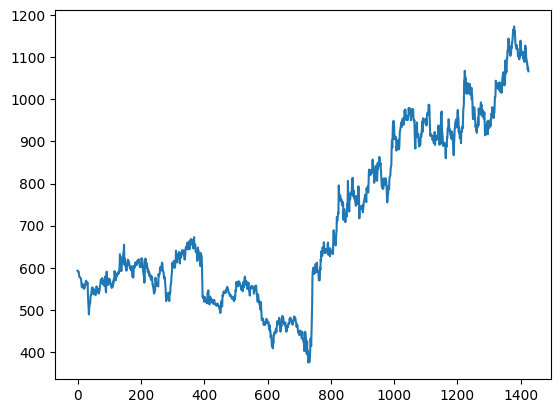

In [252]:
plt.plot(data.Close)

In [253]:
ma100=data.Close.rolling(100).mean()
ma200=data.Close.rolling(200).mean()

In [254]:
import pandas as pd
data_training=pd.DataFrame(data["Close"][0:int(len(data)*0.80)])
data_test=pd.DataFrame(data['Close'][int(len(data)*0.80):int(len(data))])

In [ ]:
'''#modifying the dataset
data1=data.reset_index().copy()
Total_data=data1.iloc[:,4:5].copy() #with this i am going to work
NCP1=Total_data.loc[0:742,:] #NCP1= Non covid period 1(2017-2020)
CP=Total_data.loc[742:988,:] #CP= Covid period(2020-2021)
NCP2=Total_data.loc[990:,:] #NCP=Non Covid period2(2021~present) here present time will vary'''

In [256]:
#from statsmodels.tsa.stattools import adfuller

In [ ]:
'''#HO : It is non Stationary
#H1 : It is  Stationary
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")'''

In [258]:
'''print(adf_test(NCP1["Close"]))
print(adf_test(NCP2["Close"]))'''


'print(adf_test(NCP1["Close"]))\nprint(adf_test(NCP2["Close"]))'

In [259]:
'''NCP1["Seasonal First Difference"]=NCP1["Close"]-NCP1["Close"].shift(12)
NCP1.head(14)'''


'NCP1["Seasonal First Difference"]=NCP1["Close"]-NCP1["Close"].shift(12)\nNCP1.head(14)'

In [260]:
#again do the dicky fuller test
#adf_test(NCP1["Seasonal First Difference"].dropna())

In [261]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [262]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.35560454],
       [0.35625712],
       [0.35177025],
       ...,
       [0.87738625],
       [0.86506778],
       [0.88309681]])

In [263]:
data_training_array.shape

(1140, 1)

In [264]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
        x_train.append(data_training_array[i-100:i])
        y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)


In [265]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [266]:
model=Sequential()
model.add(LSTM(units=20,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=40,activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(units=1))



In [267]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 20)           1760      
                                                                 
 dropout_12 (Dropout)        (None, 100, 20)           0         
                                                                 
 lstm_13 (LSTM)              (None, 40)                9760      
                                                                 
 dropout_13 (Dropout)        (None, 40)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 41        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [268]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
33/33 [==============================] - 4s 60ms/step - loss: 0.0860
Epoch 2/25
33/33 [==============================] - 2s 61ms/step - loss: 0.0154
Epoch 3/25
33/33 [==============================] - 2s 62ms/step - loss: 0.0126
Epoch 4/25
33/33 [==============================] - 2s 65ms/step - loss: 0.0114
Epoch 5/25
33/33 [==============================] - 2s 65ms/step - loss: 0.0099
Epoch 6/25
33/33 [==============================] - 2s 72ms/step - loss: 0.0097
Epoch 7/25
33/33 [==============================] - 2s 70ms/step - loss: 0.0098
Epoch 8/25
33/33 [==============================] - 2s 76ms/step - loss: 0.0087
Epoch 9/25
33/33 [==============================] - 2s 65ms/step - loss: 0.0086
Epoch 10/25
33/33 [==============================] - 2s 63ms/step - loss: 0.0083
Epoch 11/25
33/33 [==============================] - 2s 63ms/step - loss: 0.0086
Epoch 12/25
33/33 [==============================] - 2s 61ms/step - loss: 0.0078
Epoch 13/25
33/33 [==================

In [269]:
model.save('sarima_model.h5')

In [270]:
past_100_days=data_training.tail(100)
final_df=past_100_days.append(data_test,ignore_index=True)

C:\Users\chakr\AppData\Local\Temp\ipykernel_12964\60233251.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_test,ignore_index=True)


In [271]:
input_data=scaler.fit_transform(final_df)

In [272]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
        x_test.append(input_data[i-100:i])
        y_test.append(input_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)

In [273]:
y_predicted=model.predict(x_test)

9/9 [==============================] - 1s 24ms/step


In [274]:
scaler.scale_



array([0.00319285])

In [275]:
scale_factor=1/0.00319285
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

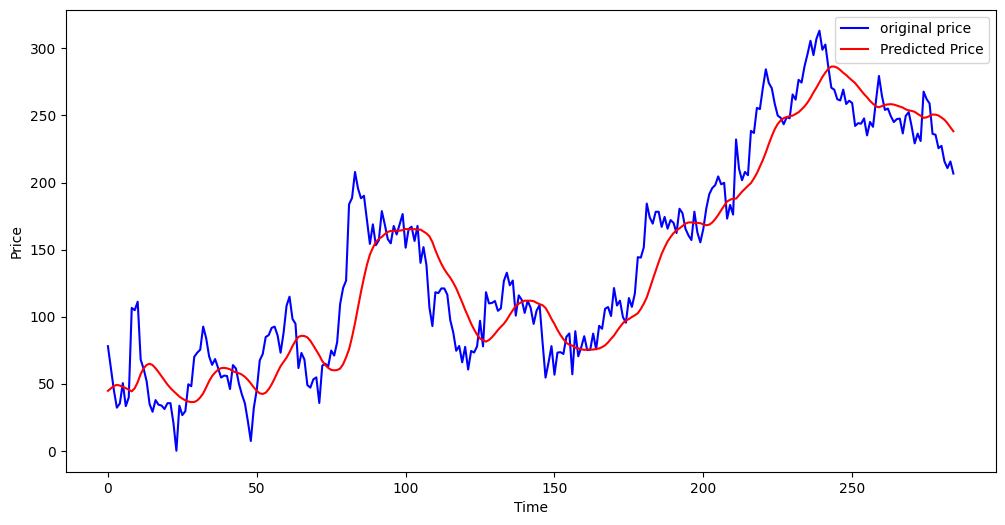

In [276]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='original price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [277]:
from sklearn.metrics import mean_absolute_error as mae
  
# calculate MAE
error = mae(y_test, y_predicted)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 21.730684295969127
